# 1.Linear Regression

##### 首先制造出我们的数据集

In [14]:
import random
def assmuing_function(x):

    return 16 * x + 6 + random.randint(-27, 27)

In [31]:
X=[x for x in range(0, 16)]

In [32]:
y = [assmuing_function(x) for x in X]

In [33]:
X

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [34]:
y

[-7, 41, 64, 62, 46, 87, 103, 120, 154, 147, 177, 177, 195, 241, 254, 247]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

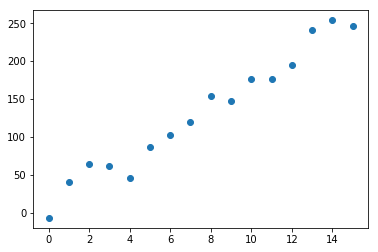

In [35]:
plt.scatter(X, y)

##### 划分数据集拟合

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [37]:
X_train

[6, 10, 4, 1, 14, 0, 15, 9, 8, 12, 11, 5]

In [38]:
X_test

[3, 13, 7, 2]

In [39]:
y_train

[103, 177, 46, 41, 254, -7, 247, 147, 154, 195, 177, 87]

##### 因为sklearn的输入需要是向量而不是列表，所以我们处理下数据

In [41]:
import numpy as np

In [42]:
def list_to_array(l):
    return np.array(l)

In [49]:
X_train=list_to_array(X_train)
X_test=list_to_array(X_test)

In [55]:
X_train

array([ 6, 10,  4,  1, 14,  0, 15,  9,  8, 12, 11,  5])

In [50]:
X_train.shape

(12,)

In [56]:
#因为LinearRegression()输入需要时列向量，所以这里要reshape一下。reshape(-1，1)代表转换为 ? x 1 的维度
X_train.reshape(-1, 1)

array([[ 6],
       [10],
       [ 4],
       [ 1],
       [14],
       [ 0],
       [15],
       [ 9],
       [ 8],
       [12],
       [11],
       [ 5]])

In [52]:
X_train.reshape(-1, 1).shape

(12, 1)

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)

In [60]:
#reg.predict其实就是
def predict(x): 
    return reg.coef_ * x + reg.intercept_

In [61]:
#看看和我们assmuing_function中的16和6差多少
print(reg.coef_)
print(reg.intercept_)

[16.80733052]
2.0253000324360357


因为我们的random.randint是加在reg.intercept_上的，所以扰动很大

In [65]:
y_pred = reg.predict(X_test.reshape(-1, 1))

In [66]:
from sklearn import metrics
metrics.mean_squared_error(y_test, y_pred)

328.7641446943772

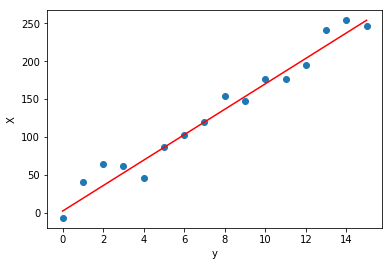

In [70]:
fig, ax = plt.subplots()
ax.set_xlabel('y')
ax.set_ylabel('X')
ax.scatter(X, y)
ax.plot(X, reg.predict(list_to_array(X).reshape(-1, 1)), color='red')

# 2.KNN

In [157]:
#封装一个KNN，方法包括train，predict这种
class KNN():
    def __init__(self,k=1,distance='L2'):
        self.k=k
        self.distance=distance
    #KNN并没有传统意义上的训练过程，这里我们存入所有的训练集数据就可以了
    def fit(self, X, y):
       self.X_train = X
       self.y_train = y       
    #输入X和k，输出预测类别
    def predict(self, X):
        #这里的dist函数是计算X和所有X_train的距离
        dists = self.distances(X)
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
             #np.argsort排出k个距离最小的X_train索引
             closest_y = self.y_train[np.argsort(dists[i])[0:self.k]]   
             #bincount选出most common
             y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred
    def distances(self, X):
        if self.distance=='L2':
            return self.L2_distances(X)
        raise Exception("输入的距离度量无效")
        
    def L2_distances(self, X):
            num_test = X.shape[0]
            num_train = self.X_train.shape[0]
            dists = np.zeros((num_test, num_train))
            #(x-y)^2=x^2 + y^2 -2xy
            dists += np.sum(self.X_train ** 2, axis=1).reshape(1, num_train)
            dists += np.sum(X ** 2, axis=1).reshape(num_test, 1) 
            dists -= 2 * np.dot(X, self.X_train.T)
            dists = np.sqrt(dists)
            return dists

##### 接下来让我们制造些适合分类的数据

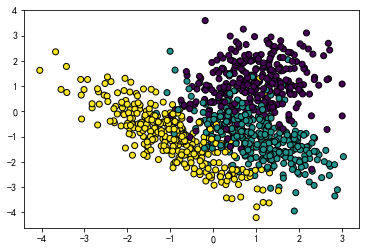

In [190]:
from sklearn.datasets.samples_generator import make_classification
# 1000个样本，每个样本2个特征，共有3个类别，每个类别一个簇
X, Y = make_classification(n_samples=1000, n_features=2,n_redundant=0,n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o',edgecolors='k', c=Y)

In [115]:
X.shape

(1000, 2)

In [143]:
Y.shape

(1000,)

现在训练集有1000个样本了，接下来是测试集。我们用meshgrid取样使得测试集填满画布

In [191]:
#训练集的边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#在边界内生成随机数据来做测试集，然后作预测
x, y = np.meshgrid(np.arange(x_min, x_max, 0.2),np.arange(y_min, y_max, 0.2))

In [192]:
x.shape

(49, 46)

In [193]:
#拉直
x.ravel().shape

(2254,)

In [194]:
#横向拼接
X_test=np.c_[x.ravel(), y.ravel()]

In [195]:
X_test.shape

(2254, 2)

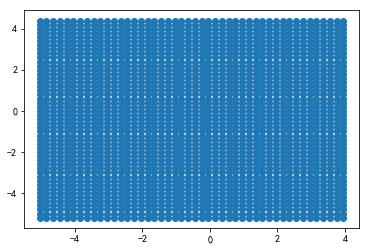

In [196]:
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o')

好了，现在我们的测试集有2565个样本

##### 接下来就可以预测，作图了

In [197]:
clf = KNN(k = 15)

In [198]:
clf.fit(X, Y)

In [199]:
Z = clf.predict(X_test)

In [200]:
Z.shape

(2254,)

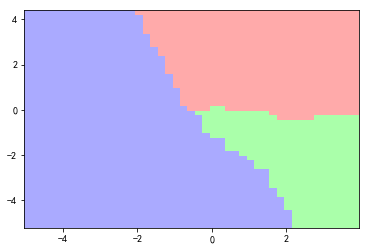

In [201]:
from matplotlib.colors import ListedColormap
#[0，1，2]类对应的颜色[红色，绿色，蓝色]
test = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# 画出测试集的预测结果
plt.pcolormesh(x,y,Z.reshape(x.shape), cmap=test)

Text(0.5, 1.0, '背景颜色代表测试数据结果，实点代表训练数据')

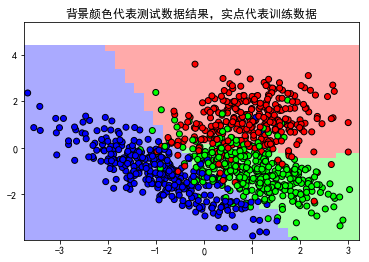

In [203]:
#把训练集的数据也都标上
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#[0，1，2]类对应的颜色[R，G，B]
train = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.pcolormesh(x,y,Z.reshape(x.shape), cmap=test)
plt.scatter(X[:, 0], X[:, 1],  marker='o',edgecolors='k',c=Y, cmap=train)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("背景颜色代表测试数据结果，实点代表训练数据" )

In [204]:
#我们输入要预测的坐标是(1,2)
test_input=(1,2)

In [205]:
category=clf.predict(np.array(test_input).reshape(-1,2))

In [206]:
category

array([0.])

说明输入是第0类，对应图中红色区域。

# 3.Decision Tree

In [209]:
#计算信息熵
from collections import Counter
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

# 4.Kmeans

##### 来一些合适聚类的数据

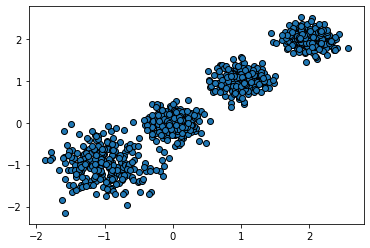

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
# X为样本特征(坐标)，Y为样本簇， 共1000个样本，每个样本2个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2])
plt.scatter(X[:, 0], X[:, 1], marker='o',edgecolors='k')

##### 开始聚类

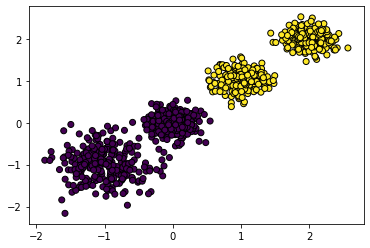

In [3]:
#k=2
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

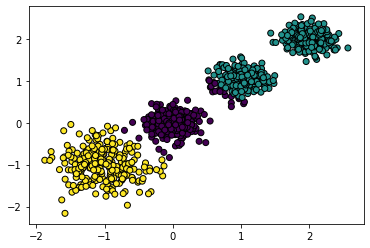

In [4]:
#k=3
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

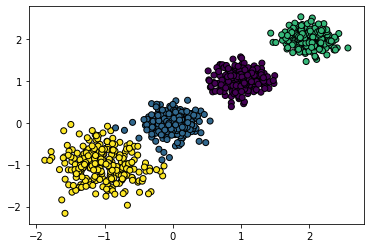

In [5]:
#k=4
y_pred = KMeans(n_clusters=4).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

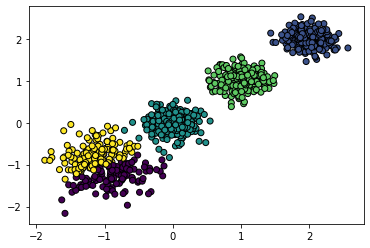

In [6]:
#k=5
y_pred = KMeans(n_clusters=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o',edgecolors='k')

#### 1. What's the *model*? why  all the models are wrong, but some are useful?
Ans: For CS model is a representation of a system using general rules and concepts sometime a parameterized set of probability distributions,which will output the thing we want with the data as input.

Below is cited from stackoverflow:

"All models are wrong" that is, every model is wrong because it is a simplification of reality. Some models, especially in the "hard" sciences, are only a little wrong. They ignore things like friction or the gravitational effect of tiny bodies. Other models are a lot wrong - they ignore bigger things. In the social sciences, we ignore a lot.

"But some are useful" - simplifications of reality can be quite useful. They can help us explain, predict and understand the universe and all its various components.

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting.
Ans:Cited from Wikioedia:

In statistics, overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit additional data or predict future observations reliably". An overfitted model is a statistical model that contains more parameters than can be justified by the data.The essence of overfitting is to have unknowingly extracted some of the residual variation (i.e. the noise) as if that variation represented underlying model structure.

Underfitting occurs when a statistical model cannot adequately capture the underlying structure of the data. An underfitted model is a model where some parameters or terms that would appear in a correctly specified model are missing.Underfitting would occur, for example, when fitting a linear model to non-linear data. Such a model will tend to have poor predictive performance.

Overfitting and underfitting can occur in machine learning, in particular. In machine learning, the phenomena are sometimes called "overtraining" and "undertraining".

Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.  Intuitively, overfitting occurs when the model or the algorithm fits the data too well.  Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.  Overfitting is often a result of an excessively complicated model, and it can be prevented by fitting multiple models and using validation or cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when a statistical model or machine learning algorithm cannot capture the underlying trend of the data.  Intuitively, underfitting occurs when the model or the algorithm does not fit the data well enough.  Specifically, underfitting occurs if the model or algorithm shows low variance but high bias.  Underfitting is often a result of an excessively simple model.

Both overfitting and underfitting lead to poor predictions on new data sets.

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? 
Ans:
True Positives (TP) - These are the correctly predicted positive values which means that the value of actual class is yes and the value of predicted class is also yes.

True Negatives (TN) - These are the correctly predicted negative values which means that the value of actual class is no and value of predicted class is also no.


False Positives (FP) – When actual class is no and predicted class is yes. 

False Negatives (FN) – When actual class is yes but predicted class in no. 

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class. 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

F2 score - F2 score is similiar with F1 Score.In the case of F2 score, the recall has a higher weight than precision. 

F2 Score = 5*(Recall * Precision) / (Recall + 4\*Precision)
 
AUC:see https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5   

#### 4. Based on our course and yourself mind, what's the machine learning? 
Ans: Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.

Traditional programming is a manual process — meaning a person (programmer) creates the program. But without anyone programming the logic, one has to manually formulate or code rules. We have the input data, and someone (programmer) coded a program that uses that data and runs on a computer to produce the desired output.

In Traditional programming one has to manually formulate/code rules while in Machine Learning the algorithms automatically formulate the rules from the data, which is very powerful. .

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？
Ans:我赞同这句话，因为针对不同的业务场景，对业务的理解非常重要-这一点可以体现在模型的评价标准上。问题的另一半在于根据对业务的理解，对模型架构的改进上。